# Description des données

On utilise les bases fournies par le site https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/. On télécharge les données pour l'année 2016 pour commencer à visualiser les données

In [27]:
import pandas as pd

folder = "data/"
year = "2016"
files = ["usagers_", "vehicules_","lieux_", "caracteristiques_"]

dfs = []

for file in files:
    print( "loading database", file + year )
    df = pd.read_csv( folder + file + year + ".csv", delimiter =',', encoding="latin1")
    print( file, ' ', df.columns)
    dfs.append(df)

loading database usagers_2016
usagers_   Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'etatp', 'an_nais', 'num_veh'],
      dtype='object')
loading database vehicules_2016
vehicules_   Index(['Num_Acc', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv',
       'num_veh'],
      dtype='object')
loading database lieux_2016
lieux_   Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'pr', 'pr1',
       'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'env1'],
      dtype='object')
loading database caracteristiques_2016
caracteristiques_   Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



On regarde les différentes colonnes

In [28]:
for db in dfs:
    print(db.columns)

Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'etatp', 'an_nais', 'num_veh'],
      dtype='object')
Index(['Num_Acc', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv',
       'num_veh'],
      dtype='object')
Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'pr', 'pr1',
       'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'env1'],
      dtype='object')
Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')


On peut essayer de faire une base de données combinées mais celle-ci est de peu de valeur étant donné qu'il y a plusieurs ligne pour un meme numéro d'accident ('Num_Acc')

In [29]:
# combined db
db_combined = dfs[0]
for i in range(3):
    db_combined = db_combined.merge(dfs[i+1], on='Num_Acc',how='left')

Examinons la catégorie 'catr' qui est celle assignée à notre groupe

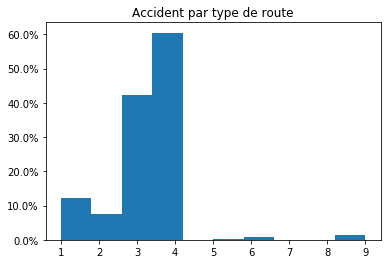

In [30]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
    
# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(dfs[2]['catr'], normed=True)

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Accident par type de route')

plt.show()

On peut aussi sortir pour la base 3 ('lieux') les premières statistiques descriptives. Cela ne peut avoir aucun sens étant donné que les données sont numérisées

In [31]:
dfs[2].describe()

,Num_Acc,catr,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,5.943200e+04,59432.000000,458.000000,59320.000000,59268.000000,24963.000000,24920.000000,59222.000000,59276.000000,59254.000000,57594.000000,57809.000000,59286.000000,59130.000000,59139.000000,59125.000000
mean,2.016000e+11,3.322133,2.113537,1.831339,2.038942,32.611626,385.797151,0.136706,1.114195,1.174537,5.141299,50.192755,1.214874,0.436411,1.126482,47.384169
std,1.715668e+04,1.146852,0.317595,0.773313,1.347160,118.285631,356.885231,0.568819,0.619874,0.735746,21.061400,62.855237,0.880435,1.348488,0.757122,49.315412
min,2.016000e+11,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.016000e+11,3.000000,2.000000,1.000000,1.000000,3.000000,50.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.016000e+11,4.000000,2.000000,2.000000,2.000000,11.000000,350.000000,0.000000,1.000000,1.000000,0.000000,50.000000,1.000000,0.000000,1.000000,3.000000
75%,2.016000e+11,4.000000,2.000000,2.000000,2.000000,31.000000,630.000000,0.000000,1.000000,1.000000,0.000000,73.000000,1.000000,0.000000,1.000000,99.000000
max,2.016001e+11,9.000000,3.000000,4.000000,13.000000,8370.000000,5660.000000,3.000000,4.000000,4.000000,907.000000,999.000000,9.000000,7.000000,5.000000,99.000000


Examinons 'hrm' qui correspond à l'heure du sinistre

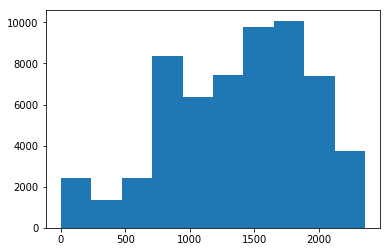

In [32]:
plt.hist( dfs[3]['hrmn'] )
plt.show()

Rajoutons des dictionnaires pour mieux expliquer les données

In [33]:
catr_dict = {
'1': 'Autoroute', 
'2': 'Nationale',
'3': 'Départementale',
'4': 'Voie Communale',
'5': 'Hors réseau public',
'6': 'Parc de stationnement',
'9': 'Autre'}

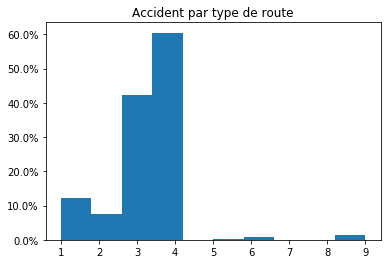

In [34]:
catr_labels = catr_dict.values()
bins = range(1, len(catr_dict)+2)

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(dfs[2]['catr'].values, normed=True)
#plt.xticks( bins, catr_labels,  rotation=-45)
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.title('Accident par type de route')
plt.show()

In [35]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot #Ajouter plot pour enregistrer un html

init_notebook_mode(connected=True)
h = [go.Histogram(x=dfs[2]['catr'])]
iplot(h)

In [36]:
import numpy as np

table = dfs[0].merge(dfs[2])
np.set_printoptions(threshold=3)
t1 = pd.crosstab(table['grav'], table['catr'] , normalize='columns')

grav_dict = { 
1: 'indemne',
2: 'tue',
3: 'blesse',
4: 'blesse leger'}

print( t1  )
print(grav_dict)
print(catr_dict)

catr         1         2         3         4         5         6         9
grav                                                                      
1     0.454995  0.387865  0.362281  0.435786  0.372881  0.440636  0.412562
2     0.017637  0.045843  0.050469  0.010289  0.045198  0.017136  0.024268
3     0.131988  0.215393  0.313577  0.157146  0.299435  0.252142  0.216274
4     0.395379  0.350899  0.273674  0.396780  0.282486  0.290086  0.346895
{1: 'indemne', 2: 'tue', 3: 'blesse', 4: 'blesse leger'}
{'1': 'Autoroute', '2': 'Nationale', '3': 'Départementale', '4': 'Voie Communale', '5': 'Hors réseau public', '6': 'Parc de stationnement', '9': 'Autre'}


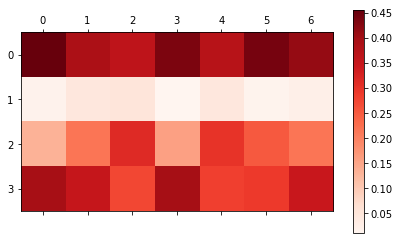

In [37]:
import matplotlib.cm as cm
plt.matshow( t1.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

catr         1         2         3         4         5         6         9
grav                                                                      
1     0.129048  0.064965  0.301651  0.488021  0.001176  0.005585  0.009554
2     0.064844  0.121094  0.628125  0.172656  0.002344  0.001563  0.009375
3     0.063546  0.065835  0.485870  0.368251  0.001737  0.004026  0.010736
4     0.123139  0.065603  0.261565  0.533648  0.000891  0.004368  0.010785


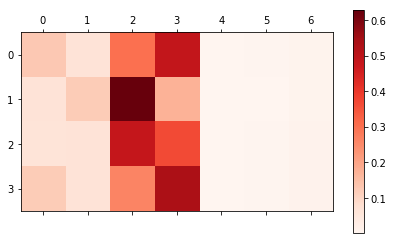

In [38]:
year = 1985
select = table['an_nais']>= year
t2 = pd.crosstab( table['grav'][select], table['catr'][select], normalize='index')

print( t2)
plt.matshow( t2.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

circ       0.0       1.0       2.0       3.0       4.0
grav                                                  
1     0.067240  0.190663  0.564820  0.171318  0.005959
2     0.047763  0.054900  0.766950  0.126544  0.003843
3     0.067915  0.115406  0.699505  0.112155  0.005018
4     0.064550  0.212867  0.540288  0.177047  0.005249


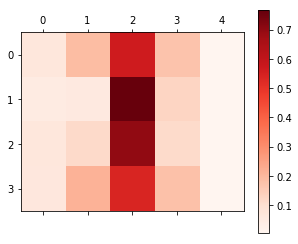

In [39]:
t2 = pd.crosstab( table['grav'], table['circ'], normalize='index')

print( t2)
plt.matshow( t2.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

In [40]:
pd.pivot_table(table,index=["catr","grav"],values=["trajet"],aggfunc=np.sum)

trajet
catr grav         
1    1     18617.0
     2       870.0
     3      5306.0
     4     16570.0
2    1      9977.0
     2      1411.0
     3      5668.0
     4      8348.0
3    1     50491.0
     2      8289.0
     3     45121.0
     4     36666.0
4    1     82607.0
     2      2343.0
     3     28240.0
     4     73390.0
5    1       227.0
     2        35.0
     3       200.0
     4       184.0
6    1      1140.0
     2        61.0
     3       684.0
     4       740.0
9    1      1327.0
     2        99.0
     3       978.0
     4       943.0

catr         1         2         3         4         5         6         9
circ                                                                      
0.0   0.068026  0.046946  0.235187  0.532475  0.006039  0.071445  0.039881
1.0   0.194748  0.049160  0.110546  0.632437  0.000924  0.003277  0.008908
2.0   0.002048  0.050018  0.463797  0.472027  0.001221  0.001208  0.009680
3.0   0.467046  0.157659  0.178420  0.193626  0.000094  0.000141  0.003013
4.0   0.052342  0.045455  0.389807  0.475207  0.005510  0.012397  0.019284


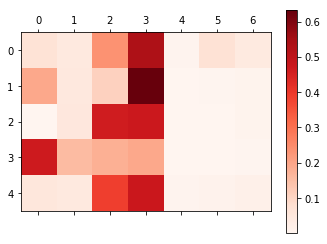

In [41]:
circ_dict = {
    1: 'sens unique',
    2: 'bidirectionel',
    3: 'chaussee separee',
    4: 'voies affectation variable'
}

t2 = pd.crosstab( table['circ'], table['catr'], normalize='index')

print( t2)
plt.matshow( t2.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

In [42]:
total = table['circ'].shape[0]
terre_plein_central = table['circ'][table['circ'] != 2 ].shape[0]
print( (total - terre_plein_central)/ total )

0.5891981832081665


In [43]:
index = np.logical_and( table['circ'] == 2, np.logical_or(table['catr'] == 2,table['catr'] == 3) )
print( 'only national and departemental without central seperataion {:.2f}%'.format( 100 * index.sum() / index.shape[0] ) )

only national and departemental without central seperataion 30.27%


In [44]:
indexes2 = np.logical_or(table['catr'] == 2,table['catr'] == 3)
print( 'only national and departemental {:.2f}%'.format(indexes2.sum() / indexes2.shape[0] * 100 ) )

only national and departemental 40.65%


# Jour 2

(2978, 18) (20741, 18)
(23719, 19)
has_tpc     False     True 
grav                       
1        0.360392  0.406640
2        0.052913  0.028575
3        0.315356  0.179437
4        0.271339  0.385348


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



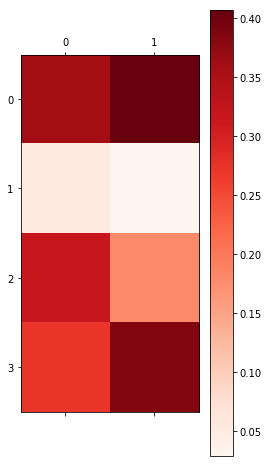

0: pas de tpc, 1: TPC
0: indemne, 1: mort, 2: blessé grave, 3: blessé léger


In [45]:
routes_nat_dep = np.logical_or(dfs[2]['catr'].values == 2, dfs[2]['catr'].values == 3)
tpc = dfs[2]['circ'].values == 3 #Est bidirectionnelle
nat_dep_tpc = np.logical_and(routes_nat_dep, tpc)
nat_dep_non_tpc = np.logical_and(routes_nat_dep, np.logical_not(tpc))
print(dfs[2][nat_dep_tpc].shape, dfs[2][nat_dep_non_tpc].shape)

lieux_interessants = dfs[2][routes_nat_dep]
lieux_interessants['has_tpc'] = nat_dep_tpc[routes_nat_dep]
print(lieux_interessants.shape)

tab = dfs[0].merge(lieux_interessants, how="inner")
crosstab = pd.crosstab(tab['grav'], tab['has_tpc'], normalize="columns")

print(crosstab)

plt.matshow(crosstab.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()
print("0: pas de tpc, 1: TPC")
print("0: indemne, 1: mort, 2: blessé grave, 3: blessé léger")

In [46]:
# Test chi2 d’indépendance
crosstab_denormalized =  pd.crosstab(tab['grav'], tab['has_tpc'])
import scipy.stats as scs
cd = pd.crosstab(tab['grav'], tab['has_tpc'])
print(cd)
res_test = scs.chi2_contingency(crosstab_denormalized)
print("La p-value est de {:.2e}. Ce n’est pas beaucoup.".format(res_test[1]))

has_tpc  False  True 
grav                 
1        16973   2903
2         2492    204
3        14852   1281
4        12779   2751
La p-value est de 5.52e-168. Ce n’est pas beaucoup.


In [47]:
# 2 contre 2
tab['mort_ou_grave'] = np.logical_or(tab['grav'] == 2, tab['grav'] == 3)
res_test_2 = scs.pearsonr(tab['has_tpc'].values, tab['mort_ou_grave'].values)
print(res_test_2)


def p_value_rpearson( res_test):
    if res_test[0] > 0:
        p_value = 1
    else:
        p_value = 2 * res_test[1]
    return p_value

p_value = p_value_rpearson(res_test_2)
print("La p-value est de {:.2e}. Ce n’est pas beaucoup.".format(p_value))
print("La corrélation est de {:.2f}.".format(res_test_2[0]))

(-0.11380856520507578, 8.8542522728742221e-156)
La p-value est de 1.77e-155. Ce n’est pas beaucoup.
La corrélation est de -0.11.


In [53]:
dfs[2][nat_dep_non_tpc]
print(dfs[2][nat_dep_non_tpc].shape)

(20741, 18)


In [49]:
print(dfs[2][nat_dep_non_tpc].shape)
tab = dfs[0].merge( dfs[2][nat_dep_non_tpc], how='inner')
print(tab.shape)

(20741, 18)
(47096, 29)


(47096, 30)
trajet        0.0       1.0       2.0       3.0       4.0       5.0       9.0
gravité                                                                      
1        0.360360  0.345669  0.256937  0.361057  0.612014  0.328166  0.337751
2        0.041149  0.043150  0.028777  0.067698  0.020313  0.068066  0.068273
3        0.301379  0.328819  0.312436  0.351386  0.140163  0.348575  0.320080
4        0.297112  0.282362  0.401850  0.219858  0.227510  0.255194  0.273896
gravité
['1 - Indemne', '2 - Tué', '3 - Blessé hospitalisé', '4 - Blessé léger']
trajet
['0 - Nan', '1 - Domicile – travail', '2 - Domicile – ecole', '3 - Courses – achats', '4 - Utilisation professionnelle', '5 - Promenade – loisirs', '9 - Autre']


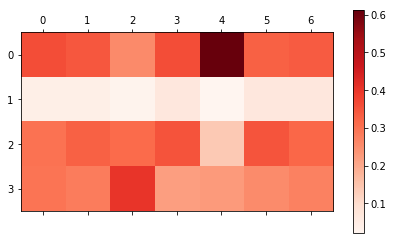

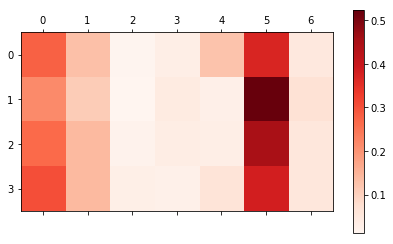

In [50]:
# MODALITES DE CIRCULATION
# trajet
tab['mort_ou_grave'] = np.logical_or(tab['grav'] == 2, tab['grav'] == 3)
print(tab.shape)
res = pd.crosstab( tab['grav'].values, tab['trajet'].values, rownames =[ 'gravité' ], colnames = ['trajet'], normalize='columns' )
print(res)
print( 'gravité')
print( [
'1 - Indemne',
'2 - Tué',
'3 - Blessé hospitalisé',
'4 - Blessé léger',    
])

print( 'trajet')
print( [
'0 - Nan', 
'1 - Domicile – travail', 
'2 - Domicile – ecole',
'3 - Courses – achats',
'4 - Utilisation professionnelle',
'5 - Promenade – loisirs',
'9 - Autre'
])


plt.matshow( res.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

res2 = pd.crosstab( tab['grav'].values, tab['trajet'].values, rownames =[ 'gravité' ], colnames = ['trajet'], normalize='index' )
plt.matshow( res2.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

In [51]:
tab['dom_travail'] = tab['trajet'] == 1
tab['promenade_loisir'] = tab['trajet'] == 5
res_test_3 = scs.pearsonr(tab['dom_travail'].values, tab['mort_ou_grave'].values)

p_value3 = res_test_3[1]
print(p_value3)
print('correl {:.2f}'.format(res_test_3[0]),' p value ={:e}'.format(p_value3))

res_test_4 = scs.pearsonr(tab['promenade_loisir'].values, tab['mort_ou_grave'].values)
p_value4 = res_test_4[1]
print('correl {:.2f}'.format(res_test_4[0]),' p value ={:e}'.format(p_value4))

0.511134839813
correl 0.00  p value =5.111348e-01
correl 0.08  p value =7.470000e-73


In [55]:
print(tab.shape)
tab = tab.merge(dfs[3], how='inner')
print(tab.shape)

(47096, 47)
(47096, 47)


col           1.0       2.0       3.0       4.0       5.0       6.0       7.0
gravité                                                                      
1        0.300959  0.445946  0.429347  0.518267  0.454427  0.293248  0.151746
2        0.070133  0.022523  0.027131  0.008873  0.046094  0.085439  0.074603
3        0.374323  0.203153  0.266260  0.128392  0.234896  0.377584  0.497460
4        0.254585  0.328378  0.277263  0.344468  0.264583  0.243730  0.276190
['1 – Deux véhicules - frontale', '2 – Deux véhicules – par l’arrière', '3 – Deux véhicules – par le coté', '4 – Trois véhicules et plus – en chaîne', '5 – Trois véhicules et plus - collisions multiples', '6 – Autre collision', '7 – Sans collision']


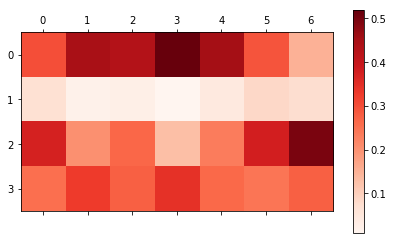

col           1.0       2.0       3.0       4.0       5.0       6.0       7.0
gravité                                                                      
1        0.170153  0.116656  0.335651  0.058505  0.102810  0.188063  0.028162
2        0.270064  0.040128  0.144462  0.006822  0.071027  0.373194  0.094302
3        0.241853  0.060733  0.237880  0.016563  0.060733  0.276730  0.105508
4        0.191173  0.114093  0.287894  0.051647  0.079505  0.207606  0.068080


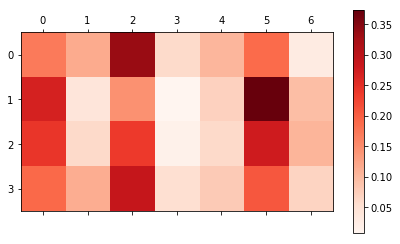

In [56]:
# type de collision
res4 = pd.crosstab( tab['grav'].values, tab['col'].values, rownames =[ 'gravité' ], colnames = ['col'], normalize='columns' )
print(res4)
print( [
'1 – Deux véhicules - frontale',
'2 – Deux véhicules – par l’arrière',
'3 – Deux véhicules – par le coté',
'4 – Trois véhicules et plus – en chaîne',
'5 – Trois véhicules et plus - collisions multiples',
'6 – Autre collision',
'7 – Sans collision'
])

plt.matshow( res4.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

res5 = pd.crosstab( tab['grav'].values, tab['col'].values, rownames =[ 'gravité' ], colnames = ['col'], normalize='index' )
print(res5)
plt.matshow( res5.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

In [57]:
tab['frontal'] = tab['col'] == 1
tab['autre'] = tab['col'] == 6
tab['sans_col'] = tab['col'] == 7
res_test_5 = scs.pearsonr(tab['frontal'].values, tab['mort_ou_grave'].values)
p_value5 = res_test_5[1]
print('correl {:.2f}'.format(res_test_5[0]),' p value ={:e}'.format(p_value5))

res_test_6 = scs.pearsonr(tab['autre'].values, tab['mort_ou_grave'].values)
p_value6 = res_test_6[1]
print('correl {:.2f}'.format(res_test_6[0]),' p value ={:e}'.format(p_value6))
     
res_test_7 = scs.pearsonr(tab['sans_col'].values, tab['mort_ou_grave'].values)
p_value7 = res_test_7[1]
print('correl {:.2f}'.format(res_test_7[0]),' p value ={:e}'.format(p_value7))

correl 0.08  p value =1.454633e-67
correl 0.11  p value =1.611986e-121
correl 0.11  p value =6.446962e-134


In [58]:
print(tab.shape)

(47096, 50)


situ          0.0       1.0       2.0       3.0       4.0       5.0
gravité                                                            
1        0.366594  0.381162  0.293478  0.149819  0.295374  0.401274
2        0.047515  0.045707  0.054348  0.129190  0.076512  0.012739
3        0.304825  0.293772  0.434783  0.537648  0.359431  0.286624
4        0.281067  0.279359  0.217391  0.183342  0.268683  0.299363
['0 - NaN', '1 – Sur chaussée', '2 – Sur bande d’arrêt d’urgence', '3 – Sur accotement', '4 – Sur trottoir', '5 – Sur piste cyclable']


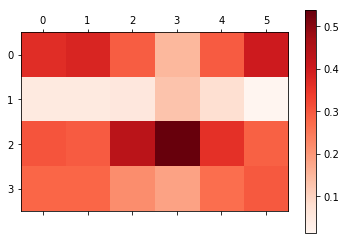

situ          0.0       1.0       2.0       3.0       4.0       5.0
gravité                                                            
1        0.059670  0.890535  0.001606  0.034565  0.009876  0.003748
2        0.052504  0.724960  0.002019  0.202342  0.017367  0.000808
3        0.056569  0.782541  0.002713  0.141423  0.013701  0.003052
4        0.060699  0.865972  0.001579  0.056121  0.011919  0.003710


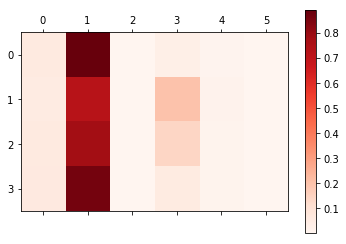

In [59]:
res4 = pd.crosstab( tab['grav'].values, tab['situ'].values, rownames =[ 'gravité' ], colnames = ['situ'], normalize='columns' )
print(res4)
print( [
'0 - NaN',
'1 – Sur chaussée',
'2 – Sur bande d’arrêt d’urgence',
'3 – Sur accotement',
'4 – Sur trottoir',
'5 – Sur piste cyclable',
])

plt.matshow( res4.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()


res5 = pd.crosstab( tab['grav'].values, tab['situ'].values, rownames =[ 'gravité' ], colnames = ['situ'], normalize='index' )
print(res5)
plt.matshow( res5.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

In [60]:
tab['situ'].value_counts()

1.0    39272
3.0     3878
0.0     2736
4.0      562
5.0      157
2.0       92
Name: situ, dtype: int64

In [61]:
tab['accotement'] = tab['situ'] == 3
res_test_5 = scs.pearsonr(tab['accotement'].values, tab['mort_ou_grave'].values)
p_value5 = res_test_5[1]
print('correl {:.2f}'.format(res_test_5[0]),' p value ={:e}'.format(p_value5))

correl 0.19  p value =0.000000e+00


In [63]:
tab = tab.merge(dfs[1],how='inner')
print(tab.shape)
tab.columns

(47096, 58)


Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'etatp', 'an_nais', 'num_veh', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'pr', 'pr1', 'vosp', 'prof', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'env1', 'mort_ou_grave', 'dom_travail',
       'promenade_loisir', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int',
       'atm', 'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep', 'frontal',
       'autre', 'sans_col', 'accotement', 'senc', 'catv', 'occutc', 'obs',
       'obsm', 'choc', 'manv'],
      dtype='object')

obs          0.0       1.0       2.0     3.0       4.0       5.0       6.0   \
gravité                                                                       
1        0.399847  0.263911  0.097125  0.1525  0.136752  0.157303  0.168028   
2        0.041152  0.042925  0.198083  0.1150  0.055556  0.078652  0.113186   
3        0.283654  0.365660  0.551438  0.4150  0.354701  0.438202  0.474912   
4        0.275347  0.327504  0.153355  0.3175  0.452991  0.325843  0.243874   

obs          7.0       8.0       9.0       10.0      11.0      12.0      13.0  \
gravité                                                                         
1        0.195122  0.153076  0.248521  0.109589  0.103448  0.140496  0.152582   
2        0.081301  0.118741  0.047337  0.123288  0.126437  0.074380  0.099765   
3        0.406504  0.447783  0.337278  0.616438  0.356322  0.479339  0.533451   
4        0.317073  0.280401  0.366864  0.150685  0.413793  0.305785  0.214202   

obs          14.0      15.0      16.0 

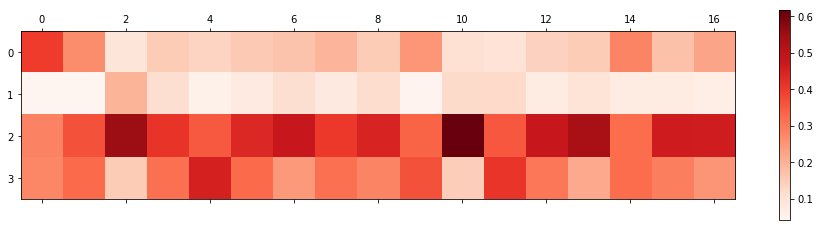

obs          0.0       1.0       2.0       3.0       4.0       5.0       6.0   \
gravité                                                                         
1        0.925072  0.009786  0.008961  0.003596  0.001886  0.000825  0.008489   
2        0.648594  0.010843  0.124498  0.018474  0.005221  0.002811  0.038956   
3        0.749680  0.015489  0.058118  0.011179  0.005590  0.002626  0.027409   
4        0.845937  0.016127  0.018788  0.009942  0.008298  0.002270  0.016361   

obs          7.0       8.0       9.0       10.0      11.0      12.0      13.0  \
gravité                                                                         
1        0.001415  0.006308  0.002476  0.000472  0.000531  0.002004  0.015327   
2        0.004016  0.033333  0.003213  0.003614  0.004418  0.007229  0.068273   
3        0.003367  0.021079  0.003839  0.003031  0.002088  0.007812  0.061216   
4        0.003053  0.015344  0.004854  0.000861  0.002818  0.005793  0.028574   

obs          14.0      15.

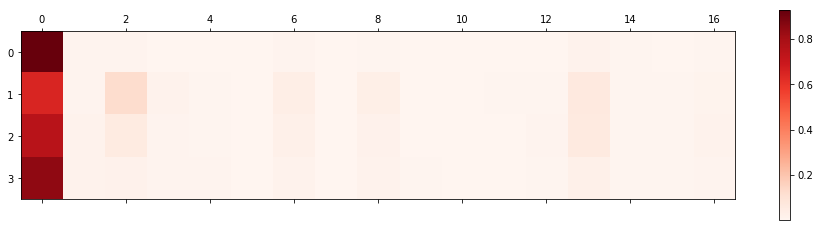

In [64]:
res4 = pd.crosstab( tab['grav'].values, tab['obs'].values, rownames =[ 'gravité' ], colnames = ['obs'], normalize='columns' )
print(res4)
print( [
'0 - NaN'
'1 – Véhicule en stationnement',
'2 – Arbre',
'3 – Glissière métallique',
'4 – Glissière béton',
'5 – Autre glissière',
'6 – Bâtiment, mur, pile de pont',
'7 – Support de signalisation verticale ou poste d’appel d’urgence',
'8 – Poteau',
'9 – Mobilier urbain',
'10 – Parapet',
'11 – Ilot, refuge, borne haute',
'12 – Bordure de trottoir',
'13 – Fossé, talus, paroi rocheuse',
'14 – Autre obstacle fixe sur chaussée',
'15 – Autre obstacle fixe sur trottoir ou accotement',
'16 – Sortie de chaussée sans obstacle',
])

plt.matshow( res4.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()


res5 = pd.crosstab( tab['grav'].values, tab['obs'].values, rownames =[ 'gravité' ], colnames = ['obs'], normalize='index' )
print(res5)
plt.matshow( res5.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

In [65]:
tab['arbre'] = tab['obs'] == 2
res_test_5 = scs.pearsonr(tab['arbre'].values, tab['mort_ou_grave'].values)
p_value5 = res_test_5[1]
print('correl {:.2f}'.format(res_test_5[0]),' p value ={:e}'.format(p_value5))

tab['fosse'] = tab['obs'] == 13
res_test_5 = scs.pearsonr(tab['fosse'].values, tab['mort_ou_grave'].values)
p_value5 = res_test_5[1]
print('correl {:.2f}'.format(res_test_5[0]),' p value ={:e}'.format(p_value5))

correl 0.15  p value =2.489525e-224
correl 0.11  p value =1.106842e-118


In [66]:
#### import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(tab['arbre'][:,np.newaxis],tab['mort_ou_grave'])
log_reg.score(tab['arbre'][:,np.newaxis],tab['mort_ou_grave'])

0.64831408187531847